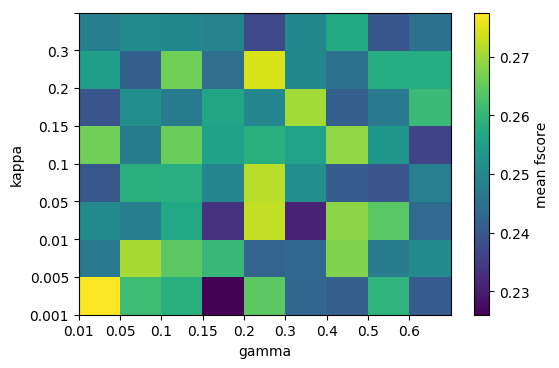

In [161]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

#here's our data to plot, all normal Python lists
gamma = [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6]
kappa = [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.3]

meanFscore = [[mean_gamma01_kappa001,mean_gamma05_kappa001,mean_gamma1_kappa001,mean_gamma15_kappa001,mean_gamma2_kappa001,mean_gamma3_kappa001,mean_gamma4_kappa001,mean_gamma5_kappa001,mean_gamma6_kappa001],
              [mean_gamma01_kappa005,mean_gamma05_kappa005,mean_gamma1_kappa005,mean_gamma15_kappa005,mean_gamma2_kappa005,mean_gamma3_kappa005,mean_gamma4_kappa005,mean_gamma5_kappa005,mean_gamma6_kappa005],
              [mean_gamma01_kappa01,mean_gamma05_kappa01,mean_gamma1_kappa01,mean_gamma15_kappa01,mean_gamma2_kappa01,mean_gamma3_kappa01,mean_gamma4_kappa01,mean_gamma5_kappa01,mean_gamma6_kappa01],
              [mean_gamma01_kappa05,mean_gamma05_kappa05,mean_gamma1_kappa05,mean_gamma15_kappa05,mean_gamma2_kappa05,mean_gamma3_kappa05,mean_gamma4_kappa05,mean_gamma5_kappa05,mean_gamma6_kappa05],
              [mean_gamma01_kappa1,mean_gamma05_kappa1,mean_gamma1_kappa1,mean_gamma15_kappa1,mean_gamma2_kappa1,mean_gamma3_kappa1,mean_gamma4_kappa1,mean_gamma5_kappa1,mean_gamma6_kappa1],
              [mean_gamma01_kappa15,mean_gamma05_kappa15,mean_gamma1_kappa15,mean_gamma15_kappa15,mean_gamma2_kappa15,mean_gamma3_kappa15,mean_gamma4_kappa15,mean_gamma5_kappa15,mean_gamma6_kappa15],
              [mean_gamma01_kappa2,mean_gamma05_kappa2,mean_gamma1_kappa2,mean_gamma15_kappa2,mean_gamma2_kappa2,mean_gamma3_kappa2,mean_gamma4_kappa2,mean_gamma5_kappa2,mean_gamma6_kappa2],
              [mean_gamma01_kappa3,mean_gamma05_kappa3,mean_gamma1_kappa3,mean_gamma15_kappa3,mean_gamma2_kappa3,mean_gamma3_kappa3,mean_gamma4_kappa3,mean_gamma5_kappa3,mean_gamma6_kappa3]
             ]


#setup the 2D grid with Numpy
gamma, kappa = np.meshgrid(gamma, kappa)

#convert intensity (list of lists) to a numpy array for plotting
meanFscore = np.array(meanFscore)

heatmap = ax.pcolor(meanFscore)
cbar = plt.colorbar(heatmap)
cbar.set_label('mean fscore')


ax.set_xlabel("gamma")
x_labels = [0.01,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.6]
ax.set(xticks=range(0, 9), xticklabels=list(x_labels))

ax.set_ylabel("kappa")
y_labels = [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.3]
ax.set_yticklabels(y_labels)



fig.savefig('fscore-heatmap-di06me03.png', dpi=100)

plt.show() #boom

In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl

In [3]:
def load_data(data_file):
    data = []
    with open(data_file) as f:
        for line in f:
            for i, value in enumerate(line.split()):
                data.append(float(value))
    return np.array(data)

In [4]:
scores_f_refs = load_data('FscoreResults_refs.txt')
scores_p_refs = load_data('precisionResults_refs.txt')
scores_r_refs = load_data('recallResults_refs.txt')

scores_f_dime = load_data('FscoreResults_dime.txt')
scores_p_dime = load_data('precisionResults_dime.txt')
scores_r_dime = load_data('recallResults_dime.txt')

scores_f_medi = load_data('FscoreResults_medi.txt')
scores_p_medi = load_data('precisionResults_medi.txt')
scores_r_medi = load_data('recallResults_medi.txt')

In [19]:
means = np.zeros((9,8))
gamma = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6]
kappa = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
for g in range(len(gamma)):
    for k in range(len(kappa)):
        means[g][k] = scores[g*len(kappa)+k]
        
means

array([[ 0.38991697,  0.38469861,  0.38045001,  0.38271809,  0.39199874,
         0.39002061,  0.38987329,  0.38715469],
       [ 0.38799203,  0.37504463,  0.38728114,  0.38119915,  0.38176137,
         0.38659609,  0.3940012 ,  0.38288088],
       [ 0.38091866,  0.37686739,  0.38274396,  0.38604758,  0.38729045,
         0.38322876,  0.38131927,  0.38926444],
       [ 0.39321567,  0.3926514 ,  0.38619072,  0.39612007,  0.37705802,
         0.37749803,  0.37886446,  0.38743508],
       [ 0.38346293,  0.37915515,  0.38710155,  0.38530427,  0.38176435,
         0.38867231,  0.39158948,  0.39033596],
       [ 0.38648689,  0.38039038,  0.38474108,  0.38936478,  0.38085903,
         0.3845585 ,  0.38464559,  0.39201037],
       [ 0.379889  ,  0.39413146,  0.38568863,  0.36967522,  0.37773307,
         0.37733643,  0.38240889,  0.3817432 ],
       [ 0.38156345,  0.39289718,  0.38309591,  0.37681037,  0.38591929,
         0.38154289,  0.38581491,  0.39042932],
       [ 0.38571361,  0.38685884

In [20]:
g, k = np.meshgrid(gamma, kappa)
g,k

(array([[ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ],
        [ 0.01,  0.05,  0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ]]),
 array([[ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001],
        [ 0.005,  0.005,  0.005,  0.005,  0.005,  0.005,  0.005,  0.005,
          0.005],
        [ 0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,
          0.01 ],
        [ 0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.05 ,
          0.05 ],
        [ 0.1  ,  0.1  ,  0.1  ,  0.1  ,  0.1  ,  

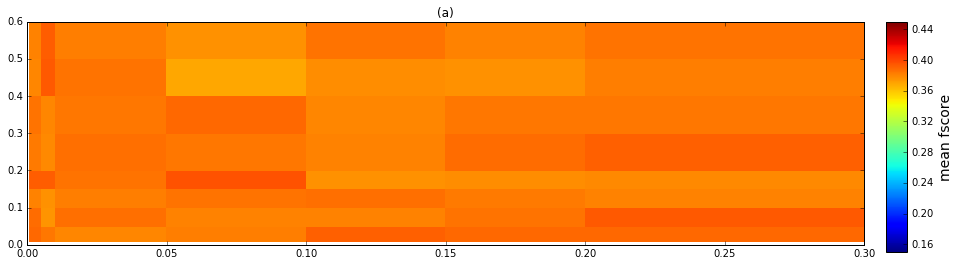

In [24]:
k, g = np.meshgrid(kappa, gamma)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=False, figsize=(15,4))
heatmap = ax1.pcolor(k, g, means, vmin=0.15, vmax=.45)
ax1.set_title('(a)')
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(heatmap, cax=cax)
cbar.set_label('mean fscore',fontsize=14)
#ax1.set_yticklabels([0,5,10,15,20],fontsize=14)
plt.show()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=False, figsize=(15,4))

snoise = [0,5,10,15,20]
vnoise = [0,5,10,15,20]
snoise, vnoise = np.meshgrid(snoise, vnoise)

meanFscore = [[mean_vnoise0_snoise0,mean_vnoise0_snoise5,mean_vnoise0_snoise10,mean_vnoise0_snoise15,mean_vnoise0_snoise20],
              [mean_vnoise5_snoise0,mean_vnoise5_snoise5,mean_vnoise5_snoise10,mean_vnoise5_snoise15,mean_vnoise5_snoise20],
              [mean_vnoise10_snoise0,mean_vnoise10_snoise5,mean_vnoise10_snoise10,mean_vnoise10_snoise15,mean_vnoise10_snoise20],
              [mean_vnoise15_snoise0,mean_vnoise15_snoise5,mean_vnoise15_snoise10,mean_vnoise15_snoise15,mean_vnoise15_snoise20],
              [mean_vnoise20_snoise0,mean_vnoise20_snoise5,mean_vnoise20_snoise10,mean_vnoise20_snoise15,mean_vnoise20_snoise20]
             ]
assoc_meanFscore = [[assoc_mean_vnoise0_snoise0,assoc_mean_vnoise0_snoise5,assoc_mean_vnoise0_snoise10,assoc_mean_vnoise0_snoise15,assoc_mean_vnoise0_snoise20],
              [assoc_mean_vnoise5_snoise0,assoc_mean_vnoise5_snoise5,assoc_mean_vnoise5_snoise10,assoc_mean_vnoise5_snoise15,assoc_mean_vnoise5_snoise20],
              [assoc_mean_vnoise10_snoise0,assoc_mean_vnoise10_snoise5,assoc_mean_vnoise10_snoise10,assoc_mean_vnoise10_snoise15,assoc_mean_vnoise10_snoise20],
              [assoc_mean_vnoise15_snoise0,assoc_mean_vnoise15_snoise5,assoc_mean_vnoise15_snoise10,assoc_mean_vnoise15_snoise15,assoc_mean_vnoise15_snoise20],
              [assoc_mean_vnoise20_snoise0,assoc_mean_vnoise20_snoise5,assoc_mean_vnoise20_snoise10,assoc_mean_vnoise20_snoise15,assoc_mean_vnoise20_snoise20]
             ]

condWD_meanFscore = [[condWD_mean_vnoise0_snoise0,condWD_mean_vnoise0_snoise5,condWD_mean_vnoise0_snoise10,condWD_mean_vnoise0_snoise15,condWD_mean_vnoise0_snoise20],
              [condWD_mean_vnoise5_snoise0,condWD_mean_vnoise5_snoise5,condWD_mean_vnoise5_snoise10,condWD_mean_vnoise5_snoise15,condWD_mean_vnoise5_snoise20],
              [condWD_mean_vnoise10_snoise0,condWD_mean_vnoise10_snoise5,condWD_mean_vnoise10_snoise10,condWD_mean_vnoise10_snoise15,condWD_mean_vnoise10_snoise20],
              [condWD_mean_vnoise15_snoise0,condWD_mean_vnoise15_snoise5,condWD_mean_vnoise15_snoise10,condWD_mean_vnoise15_snoise15,condWD_mean_vnoise15_snoise20],
              [condWD_mean_vnoise20_snoise0,condWD_mean_vnoise20_snoise5,condWD_mean_vnoise20_snoise10,condWD_mean_vnoise20_snoise15,condWD_mean_vnoise20_snoise20]
             ]

condOBJ_meanFscore = [[condOBJ_mean_vnoise0_snoise0,condOBJ_mean_vnoise0_snoise5,condOBJ_mean_vnoise0_snoise10,condOBJ_mean_vnoise0_snoise15,condOBJ_mean_vnoise0_snoise20],
              [condOBJ_mean_vnoise5_snoise0,condOBJ_mean_vnoise5_snoise5,condOBJ_mean_vnoise5_snoise10,condOBJ_mean_vnoise5_snoise15,condOBJ_mean_vnoise5_snoise20],
              [condOBJ_mean_vnoise10_snoise0,condOBJ_mean_vnoise10_snoise5,condOBJ_mean_vnoise10_snoise10,condOBJ_mean_vnoise10_snoise15,condOBJ_mean_vnoise10_snoise20],
              [condOBJ_mean_vnoise15_snoise0,condOBJ_mean_vnoise15_snoise5,condOBJ_mean_vnoise15_snoise10,condOBJ_mean_vnoise15_snoise15,condOBJ_mean_vnoise15_snoise20],
              [condOBJ_mean_vnoise20_snoise0,condOBJ_mean_vnoise20_snoise5,condOBJ_mean_vnoise20_snoise10,condOBJ_mean_vnoise20_snoise15,condOBJ_mean_vnoise20_snoise20]
             ]

meanFscore = np.array(meanFscore)
assoc_meanFscore = np.array(assoc_meanFscore)
condWD_meanFscore = np.array(condWD_meanFscore)
condOBJ_meanFscore = np.array(condOBJ_meanFscore)

data = [meanFscore,assoc_meanFscore,condWD_meanFscore,condOBJ_meanFscore]


heatmap = ax1.pcolor(snoise, vnoise, meanFscore, vmin=0, vmax=1)
ax1.set_title('(a)')
assoc_heatmap = ax2.pcolor(snoise, vnoise,assoc_meanFscore, vmin=0, vmax=1)
ax2.set_title('(b)')
condWD_heatmap = ax3.pcolor(snoise, vnoise,condWD_meanFscore, vmin=0, vmax=1)
ax3.set_title('(c)')
condOBJ_heatmap = ax4.pcolor(snoise, vnoise,condOBJ_meanFscore, vmin=0, vmax=1)
ax4.set_title('(d)')


#cbar = fig.colorbar(heatmap)
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(heatmap, cax=cax)
cbar.set_label('mean fscore',fontsize=14)
ax1.set_yticklabels([0,5,10,15,20],fontsize=14)
ax1.set_xticklabels([0,5,10,15,20],fontsize=14)
ax2.set_yticklabels([0,5,10,15,20],fontsize=14)
ax2.set_xticklabels([0,5,10,15,20],fontsize=14)
ax3.set_yticklabels([0,5,10,15,20],fontsize=14)
ax3.set_xticklabels([0,5,10,15,20],fontsize=14)
ax4.set_yticklabels([0,5,10,15,20],fontsize=14)
ax4.set_xticklabels([0,5,10,15,20],fontsize=14)
#ax3.set_xlabel("noise in speech recognition in percentage")
#ax1.set_ylabel("percentage of noise in vision")
fig.text(0.5, -0.02, 'percentage of noise in speech recognition', ha='center', fontsize=16)
fig.text(0.08, 0.5, 'percentage of noise in vision', va='center', rotation='vertical', fontsize=16)

for item in ([ax3.xaxis.label, ax1.yaxis.label, ax1.title, ax2.title, ax3.title, ax4.title]):
    item.set_fontsize(16)

fig.savefig('fscore-heatmap-all.png', dpi=100, bbox_inches='tight')

plt.show() #boom